!pip install pysentimiento
https://pypi.org/project/pysentimiento/

In [70]:
import pandas as pd
from pysentimiento import SentimentAnalyzer

In [71]:
#analyzer = SentimentAnalyzer()
#analyzer.predict("Qué gran jugador es Messi")
## returns 'POS'
#analyzer.predict("Esto es pésimo")
## returns 'NEG'
#analyzer.predict("Qué es esto?")
## returns 'NEU'

#analyzer.predict_probas("Dónde estamos?")

In [130]:
pd.set_option('max_colwidth', 800)

bancos = ['Mercantil', 'Banesco', 'Venezuela', 'Provincial', 'BOD', 'Sudeban']
ids = [67401711, 105219620, 149959442, 126086956, 221765424, 835785594]

id = 835785594

data_read = pd.read_csv(f'{id}.csv')

In [131]:
data_read.head()

,Unnamed: 0,created_at,author_id,id,text
0,0,2021-04-28T23:14:05.000Z,3312459507,1387545684165988356,@fatimacpb @BCV_ORG_VE #AFECTADOSDICOM El banco Venezuela no me permite movilizar las divisas compradas en dicom 2018 necesito mi dinero @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad
1,1,2021-04-28T23:11:47.000Z,3312459507,1387545105754738690,@BcodeVenezuela Buenas noches el banco no me permite movilizar las divisas comprada en el dicom 2018 necesito mi dinero #AFECTADOSDICOM @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad
2,2,2021-04-28T23:08:44.000Z,3312459507,1387544340029923336,@descifradocom Buenas noches cuando van a liberar las divisas compradas en el dicom en el 2018 #AFECTADOSDICOM @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad
3,3,2021-04-28T23:07:55.000Z,625806696,1387544133150158849,@SudebanInforma Buenas tardes Sres de Sudeban! Denuncia!. Hago de su conocimiento qué en reiteradas visitas a las oficinas del Banco Provincial (Ofc Ppal y Altamira) no están permitiendo el Cambio dé Divisas (€) con la excusa de sólo cambiar a BsS la cantidad de 100€ al Mes.
4,4,2021-04-28T22:33:27.000Z,1387211500146864130,1387535460269006849,"@BcodeVenezuela Sres. BDV desde 2018 tengo bloqueados mis dólares comprados con DICOM, den respuesta a ésto, hay demasiada necesidad con ésta pandemia, sean humanos con el pueblo! @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @josejmoralesu78 @simonzerpad"


In [132]:
%%time
diccionario_analisis = {'neg':[], 'neu':[], 'pos' : []}

for indice_fila, fila in data_read.iterrows():
    analisis = analyzer.predict_probas(fila.text)
    diccionario_analisis['neg'].append(analisis['NEG'])
    diccionario_analisis['neu'].append(analisis['NEU'])
    diccionario_analisis['pos'].append(analisis['POS'])

CPU times: user 8min 46s, sys: 3.95 s, total: 8min 50s
Wall time: 4min 29s


In [133]:
pd.DataFrame(diccionario_analisis).head()

,neg,neu,pos
0,0.995441,0.003068,0.001491
1,0.995416,0.003266,0.001319
2,0.095244,0.888765,0.015991
3,0.992581,0.005516,0.001903
4,0.990154,0.007231,0.002615


In [134]:
resultados = data_read.copy()
resultados = resultados[0:len(diccionario_analisis['neg'])]

for i in diccionario_analisis.keys():
    resultados[i] = diccionario_analisis[i]

In [135]:
resultados.shape

(800, 8)

In [136]:
resultados.head()

,Unnamed: 0,created_at,author_id,id,text,neg,neu,pos
0,0,2021-04-28T23:14:05.000Z,3312459507,1387545684165988356,@fatimacpb @BCV_ORG_VE #AFECTADOSDICOM El banco Venezuela no me permite movilizar las divisas compradas en dicom 2018 necesito mi dinero @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad,0.995441,0.003068,0.001491
1,1,2021-04-28T23:11:47.000Z,3312459507,1387545105754738690,@BcodeVenezuela Buenas noches el banco no me permite movilizar las divisas comprada en el dicom 2018 necesito mi dinero #AFECTADOSDICOM @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad,0.995416,0.003266,0.001319
2,2,2021-04-28T23:08:44.000Z,3312459507,1387544340029923336,@descifradocom Buenas noches cuando van a liberar las divisas compradas en el dicom en el 2018 #AFECTADOSDICOM @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad,0.095244,0.888765,0.015991
3,3,2021-04-28T23:07:55.000Z,625806696,1387544133150158849,@SudebanInforma Buenas tardes Sres de Sudeban! Denuncia!. Hago de su conocimiento qué en reiteradas visitas a las oficinas del Banco Provincial (Ofc Ppal y Altamira) no están permitiendo el Cambio dé Divisas (€) con la excusa de sólo cambiar a BsS la cantidad de 100€ al Mes.,0.992581,0.005516,0.001903
4,4,2021-04-28T22:33:27.000Z,1387211500146864130,1387535460269006849,"@BcodeVenezuela Sres. BDV desde 2018 tengo bloqueados mis dólares comprados con DICOM, den respuesta a ésto, hay demasiada necesidad con ésta pandemia, sean humanos con el pueblo! @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @josejmoralesu78 @simonzerpad",0.990154,0.007231,0.002615


<AxesSubplot:>

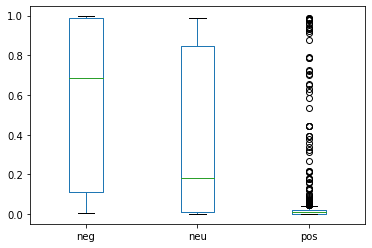

In [137]:
resultados[['neg','neu','pos']].plot(kind='box') #la amplia mayoría son neutros

CPU times: user 28.3 s, sys: 360 ms, total: 28.6 s
Wall time: 28.2 s


<AxesSubplot:xlabel='pos'>

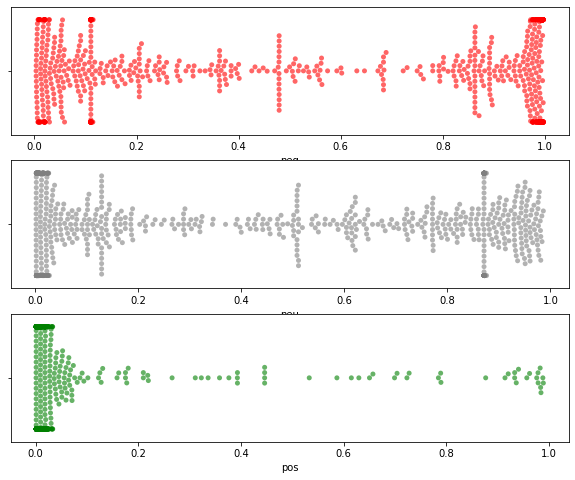

In [145]:
%%time
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))

sns.swarmplot(resultados.neg , ax = ax[0], color = 'red', alpha = 0.6)
sns.swarmplot(resultados.neu , ax = ax[1], color = 'grey', alpha = 0.6)
sns.swarmplot(resultados.pos , ax = ax[2], color = 'green', alpha = 0.6)

In [139]:
tags = ['neg' , 'neu', 'pos']

In [140]:
resultados[tags]

,neg,neu,pos
0,0.995441,0.003068,0.001491
1,0.995416,0.003266,0.001319
2,0.095244,0.888765,0.015991
3,0.992581,0.005516,0.001903
4,0.990154,0.007231,0.002615
...,...,...,...
795,0.026753,0.795695,0.177552
796,0.908691,0.079556,0.011753
797,0.075834,0.907265,0.016901
798,0.996677,0.001912,0.001411


In [141]:
resultados['score'] = resultados[tags].idxmax(axis=1)

In [142]:
resultados.head()

,Unnamed: 0,created_at,author_id,id,text,neg,neu,pos,score
0,0,2021-04-28T23:14:05.000Z,3312459507,1387545684165988356,@fatimacpb @BCV_ORG_VE #AFECTADOSDICOM El banco Venezuela no me permite movilizar las divisas compradas en dicom 2018 necesito mi dinero @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad,0.995441,0.003068,0.001491,neg
1,1,2021-04-28T23:11:47.000Z,3312459507,1387545105754738690,@BcodeVenezuela Buenas noches el banco no me permite movilizar las divisas comprada en el dicom 2018 necesito mi dinero #AFECTADOSDICOM @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad,0.995416,0.003266,0.001319,neg
2,2,2021-04-28T23:08:44.000Z,3312459507,1387544340029923336,@descifradocom Buenas noches cuando van a liberar las divisas compradas en el dicom en el 2018 #AFECTADOSDICOM @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @tarekwiliamsaab @josejmoralesu78 @simonzerpad,0.095244,0.888765,0.015991,neu
3,3,2021-04-28T23:07:55.000Z,625806696,1387544133150158849,@SudebanInforma Buenas tardes Sres de Sudeban! Denuncia!. Hago de su conocimiento qué en reiteradas visitas a las oficinas del Banco Provincial (Ofc Ppal y Altamira) no están permitiendo el Cambio dé Divisas (€) con la excusa de sólo cambiar a BsS la cantidad de 100€ al Mes.,0.992581,0.005516,0.001903,neg
4,4,2021-04-28T22:33:27.000Z,1387211500146864130,1387535460269006849,"@BcodeVenezuela Sres. BDV desde 2018 tengo bloqueados mis dólares comprados con DICOM, den respuesta a ésto, hay demasiada necesidad con ésta pandemia, sean humanos con el pueblo! @BCV_ORG_VE @sudebaninforma @minecofinanzas @tsj_venezuela @josejmoralesu78 @simonzerpad",0.990154,0.007231,0.002615,neg


In [143]:
resultados[tags].idxmax(axis=1).value_counts()

neg    434
neu    336
pos     30
dtype: int64

In [144]:
resultados.to_csv(f'{id}_score.csv')